In [1]:
import numpy as np

N = 10
n = 100

q = [ (np.exp(-(i-30)**2 / 100 ) + 2*np.exp(-(i-68)**2 / 100)) for i in range(1,101)]
q = np.array(q)
r = np.array([np.exp(-(i - 50)**2 / 100) for i in range(1,101)])

q = q/sum(q)
r = r/sum(r)

In [10]:
blue_to_red[1]

TypeError: 'LinearSegmentedColormap' object is not subscriptable

C:\Users\Latitude 5289 2-in-1\AppData\Local\Temp\ipykernel_3196\188786366.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  blue_to_red = cm.get_cmap('coolwarm')


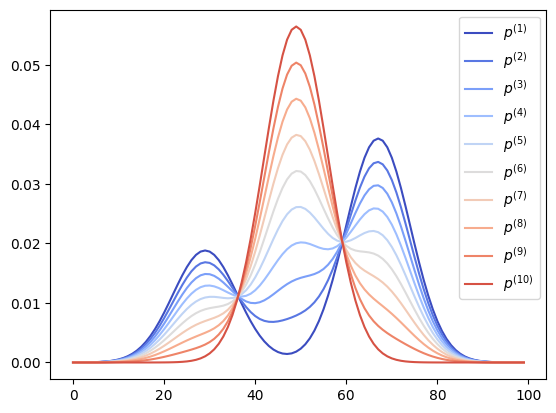

c:\Users\Latitude 5289 2-in-1\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


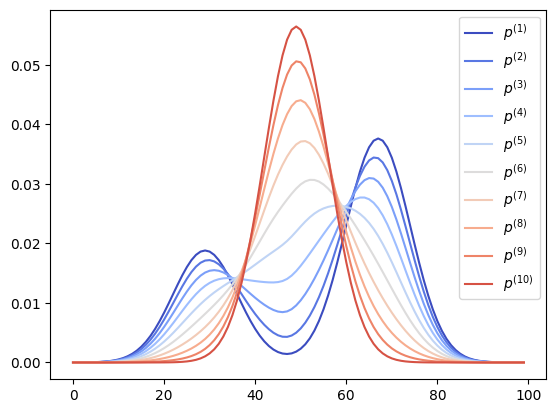

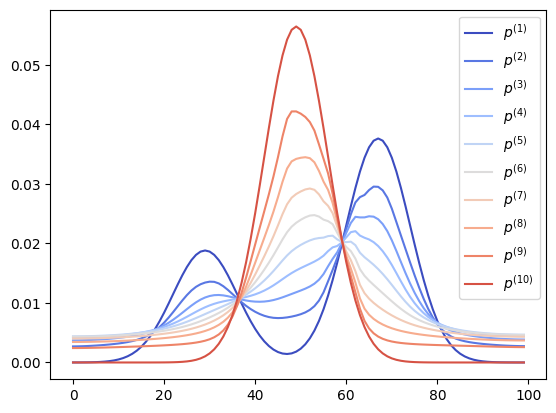

In [23]:
import cvxpy as cp
import matplotlib.pyplot as plt
from matplotlib import cm

blue_to_red = cm.get_cmap('coolwarm')
colors = [blue_to_red(i) for i in np.linspace(0,0.9,N)]

func = [ lambda a,b :cp.sum_squares(a-b)
        ,lambda a,b : 2-2*cp.sum([cp.geo_mean(cp.vstack([a[i],b[i]]))for i in range(n)])
        ,lambda a,b : cp.max(cp.vstack([cp.abs(cp.sum(a[:i]-b[:i]))for i in range(1,n)]))  ]

for f in func :
    p = cp.Variable((n,N),nonneg=True)
    obj = cp.Minimize(cp.sum([f(p[:,i],p[:,i+1])for i in range(N-1)]))
    cons = [p>=0,p[:,0]==q,p[:,N-1]==r,p.T@np.ones(n)==np.ones(N)]
    prob = cp.Problem(obj,cons)
    prob.solve(solver ="ECOS")
    p=p.value
    for i in range(N):
        plt.plot(p[:,i],label="$p^{(%d)}$"%(i+1),color =colors[i])
    plt.legend()
    plt.show()

